In [1]:
#Chance Of Being A Victim Of Violent Crime In San Francisco is 1 in 119
#The chance of being a victim of property crime in San Francisco is 1 in 18
#The chance of being a victim of crime in San Francisco is 1 in 19

%matplotlib inline
import pandas as pd
import numpy as np
 
#Load Data with pandas, and parse the first column into datetime
SF_train_data = pd.read_csv('train.csv', parse_dates = ['Dates'])
SF_test_data = pd.read_csv('test.csv', parse_dates = ['Dates'])
SF_train_data.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [2]:
# look for missing values
SF_train_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [3]:
#Look for duplicate data on the dataset
duplicate = pd.DataFrame.duplicated(SF_train_data)
print len(duplicate[duplicate == True])
SF_train_data = SF_train_data.drop_duplicates()

2323


In [4]:
#Calculate the category frequency and get a summary of the main statistics
categories = SF_train_data.groupby('Category')
categoriesFreq = categories.size() # total records for each category
categoriesFreq.describe()

count        39.000000
mean      22454.512821
std       37970.535660
min           6.000000
25%        1185.500000
50%        4380.000000
75%       28531.500000
max      174320.000000
dtype: float64

In [5]:
pd.value_counts(SF_train_data.Category.values).head(10)

LARCENY/THEFT     174320
OTHER OFFENSES    125960
NON-CRIMINAL       91915
ASSAULT            76815
DRUG/NARCOTIC      53919
VEHICLE THEFT      53706
VANDALISM          44581
WARRANTS           42145
BURGLARY           36600
SUSPICIOUS OCC     31394
dtype: int64

In [6]:
from sklearn import preprocessing

#xy_scaler=preprocessing.StandardScaler()
#xy_scaler.fit(SF_train_data[["X","Y"]])
#SF_train_data[["X","Y"]]=xy_scaler.transform(SF_train_data[["X","Y"]])
#SF_train_data=SF_train_data[abs(SF_train_data["Y"])<100]
#SF_train_data.index=range(len(SF_train_data))

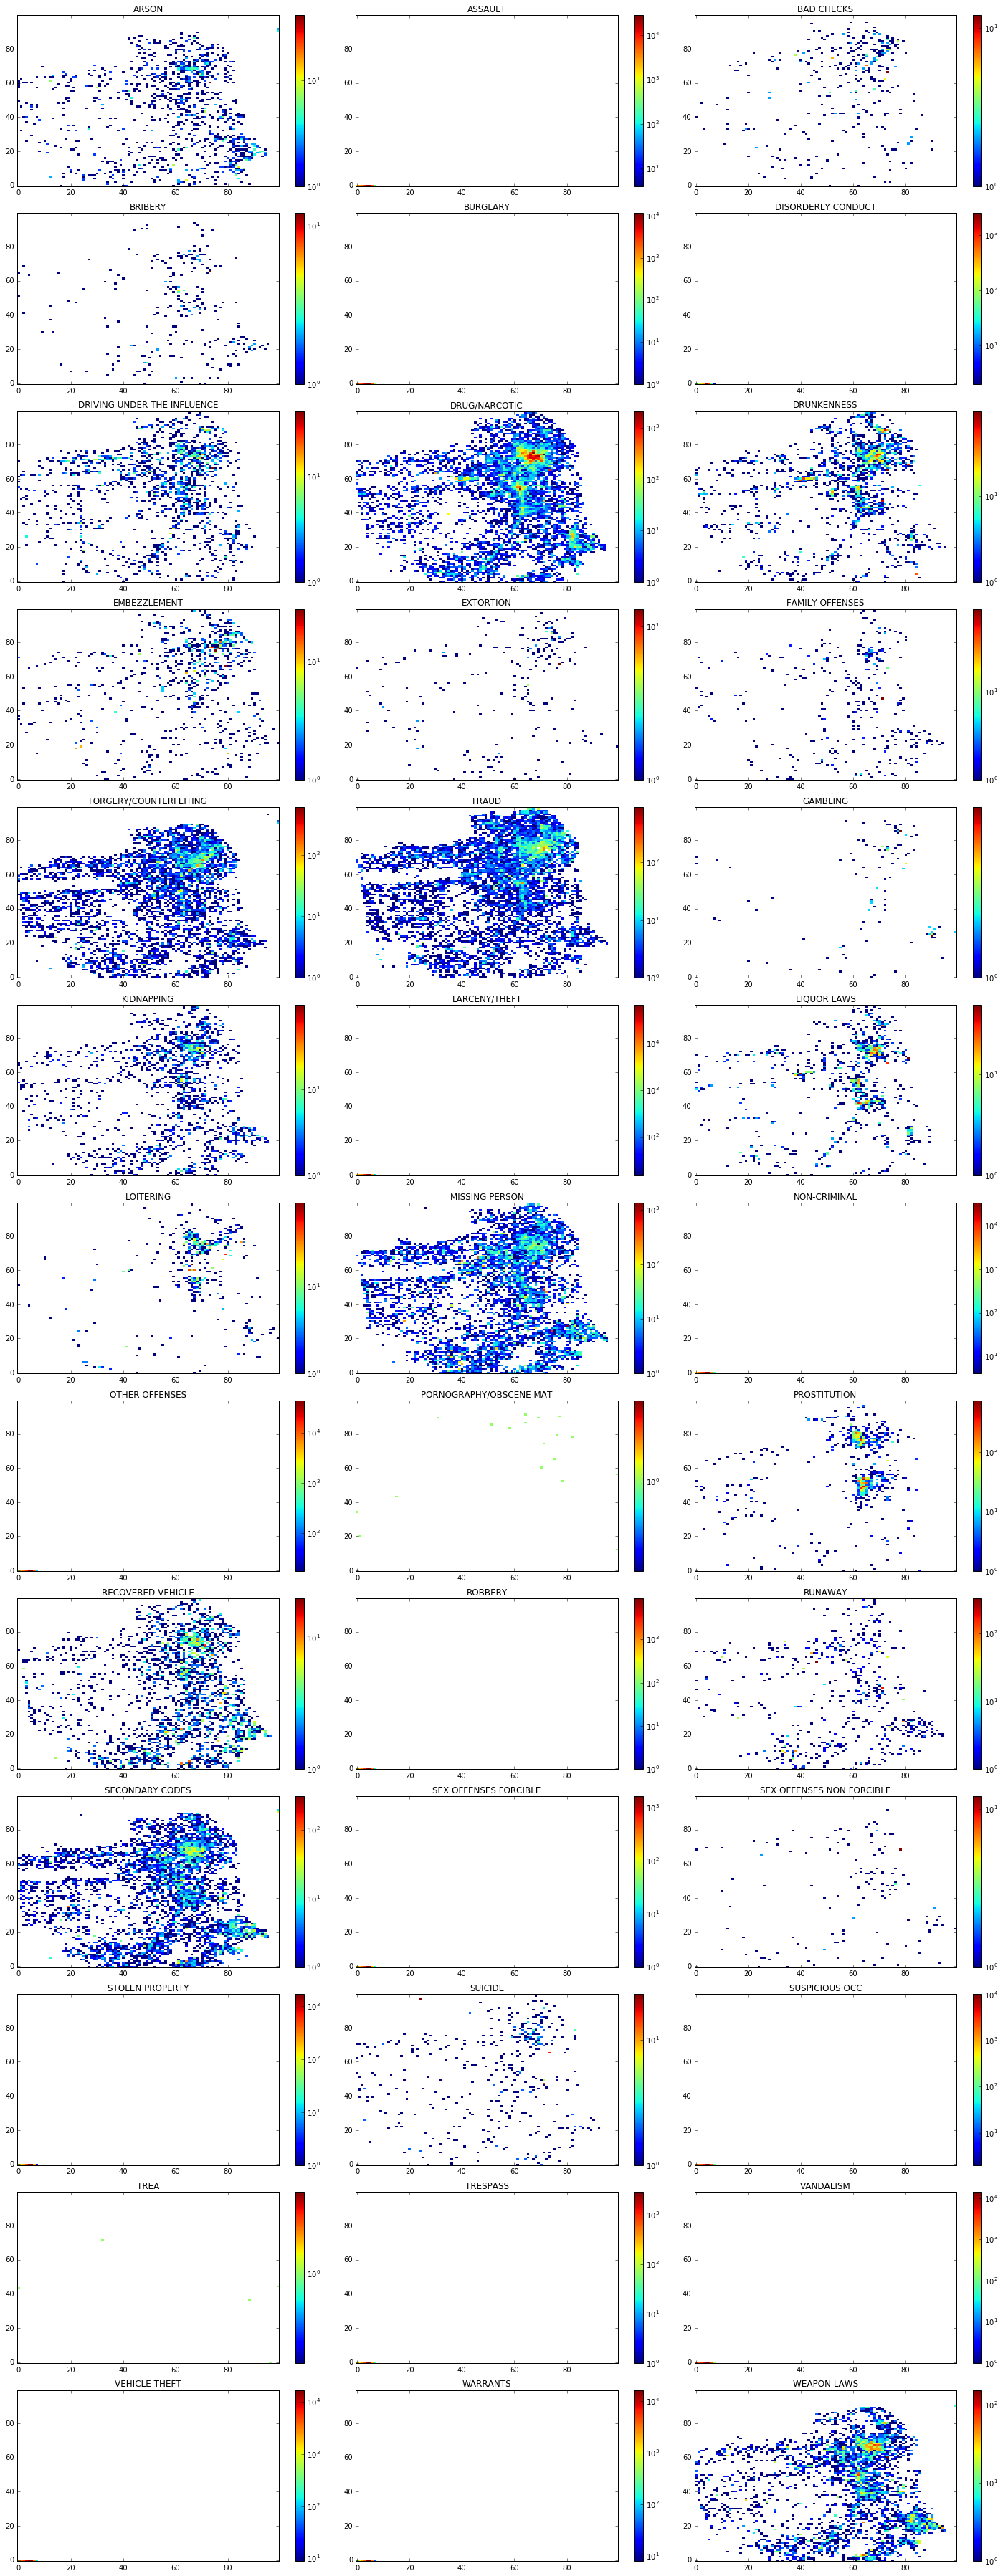

In [7]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

categories = SF_train_data.groupby('Category')
pos=1
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(left=0.2, bottom=0.1)

for name, category in categories:
    ax1 = fig.add_subplot(13, 3, pos)
    ax1.set_title(name)
    histo, xedges, yedges = np.histogram2d(np.array(category.X),
                                           np.array(category.Y), 
                                           bins=(100,100))
    cax = ax1.imshow(histo.T, 
                     origin='low', 
                     interpolation='nearest', 
                     aspect='auto', 
                     norm=LogNorm())
    cbar = fig.colorbar(cax)
    pos+=1

fig.tight_layout()
del categories

In [8]:
#Try with groupby by year and month
dayOfWeek = SF_train_data.groupby('DayOfWeek')
dayOfWeekFreq = dayOfWeek.size().sort_index() # total records for each category
dayOfWeekFreq.describe()

count         7.000000
mean     125103.714286
std        5396.993753
min      116394.000000
25%      122953.000000
50%      124757.000000
75%      127649.000000
max      133371.000000
dtype: float64

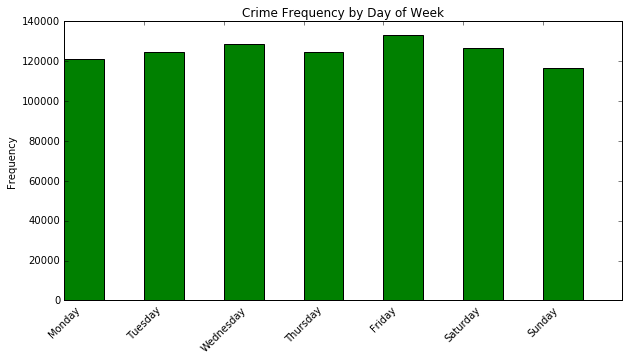

In [9]:
N = 7
myorder=[1,5,6,4,0,2,3]
dayOfWeek = np.arange(N) 
fig, ax1= plt.subplots(figsize=(10,5))
ax1.bar(dayOfWeek, dayOfWeekFreq[myorder], 0.5, color='green')

# add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Frequency by Day of Week')
ax1.set_xticklabels(('Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                     'Friday', 'Saturday', 'Sunday'), rotation=45)

In [10]:
PdDistrict = SF_train_data.groupby('PdDistrict')
PdDistrictFreq = PdDistrict.size() # total records for each category
PdDistrictFreq.describe()

count        10.000000
mean      87572.600000
std       33316.203086
min       45080.000000
25%       68730.500000
50%       83454.500000
75%      101103.250000
max      156528.000000
dtype: float64

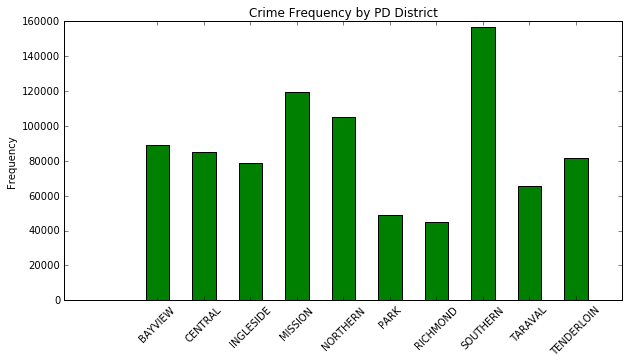

In [15]:
N = 10
pdDistricts = np.arange(N) 
fig, ax1= plt.subplots(figsize=(10, 5))
ax1.bar(pdDistricts, PdDistrictFreq, 0.5, color='green', align='center')

# add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Frequency by PD District')
ax1.set_xticks(pdDistricts)
ax1.set_xticklabels(('BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 
                     'NORTHERN', 'PARK', 'RICHMOND', 
                     'SOUTHERN', 'TARAVAL', 'TENDERLOIN'), rotation=45)

In [20]:
#Calculate the resolution frequency
Resolution = SF_train_data.groupby('Resolution')
ResolutionFreq = Resolution.size()
resolutionLabels = pd.unique(SF_train_data.Resolution.ravel())
resolutionLabels.sort()
print resolutionLabels

['ARREST, BOOKED' 'ARREST, CITED' 'CLEARED-CONTACT JUVENILE FOR MORE INFO'
 'COMPLAINANT REFUSES TO PROSECUTE'
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE' 'EXCEPTIONAL CLEARANCE'
 'JUVENILE ADMONISHED' 'JUVENILE BOOKED' 'JUVENILE CITED'
 'JUVENILE DIVERTED' 'LOCATED' 'NONE' 'NOT PROSECUTED'
 'PROSECUTED BY OUTSIDE AGENCY' 'PROSECUTED FOR LESSER OFFENSE'
 'PSYCHOPATHIC CASE' 'UNFOUNDED']


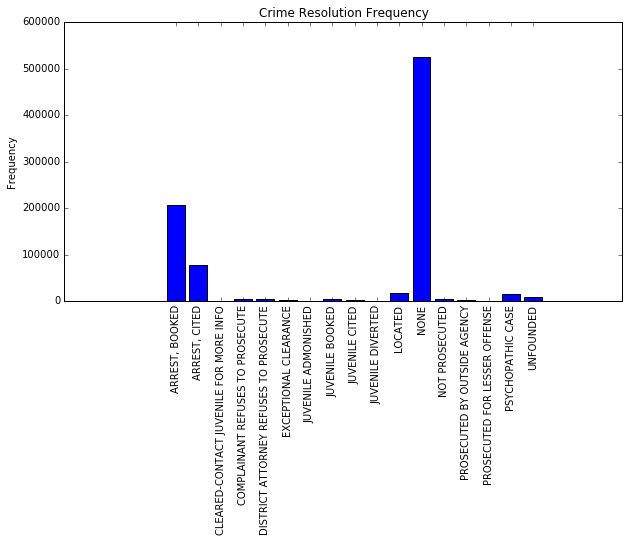

In [29]:
N = 17
resolution = np.arange(N) 
fig, ax1= plt.subplots(figsize=(10, 5))
ax1.bar(resolution, ResolutionFreq, 0.8, color='blue', align='center')

# add some text for title and axes
ax1.set_ylabel('Frequency')
ax1.set_title('Crime Resolution Frequency')
ax1.set_xticks(resolution)
ax1.set_xticklabels(('ARREST, BOOKED', 'ARREST, CITED', 
                     'CLEARED-CONTACT JUVENILE FOR MORE INFO',
                     'COMPLAINANT REFUSES TO PROSECUTE',
                     'DISTRICT ATTORNEY REFUSES TO PROSECUTE', 
                     'EXCEPTIONAL CLEARANCE','JUVENILE ADMONISHED', 
                     'JUVENILE BOOKED', 'JUVENILE CITED',
                     'JUVENILE DIVERTED', 'LOCATED', 'NONE', 
                     'NOT PROSECUTED', 'PROSECUTED BY OUTSIDE AGENCY',
                     'PROSECUTED FOR LESSER OFFENSE', 'PSYCHOPATHIC CASE',
                     'UNFOUNDED'), rotation=90)

In [30]:
#Cross-tabulate Category and PdDistrict
SF_crosstab = pd.crosstab(SF_train_data.PdDistrict, SF_train_data.Category, margins=True)
SF_crosstab.head(5)

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,All
PdDistrict,,,,,,,,,,,,,,,,,,,,,
BAYVIEW,393,9845,34,56,3914,218,179,4496,243,100,...,397,37,3903,3,635,5344,7199,4319,1645,89098
CENTRAL,111,6971,65,12,4499,494,160,1805,517,178,...,510,60,2841,1,904,4451,4208,2776,486,85267
INGLESIDE,182,8522,32,53,3327,171,206,2372,190,78,...,347,65,3166,0,415,5363,8950,2522,1130,78722
MISSION,144,11146,46,66,3736,1097,357,8750,782,124,...,631,72,3807,1,1017,5273,7134,6605,1329,119723
NORTHERN,149,8312,54,18,5827,450,260,4508,368,131,...,698,67,3269,1,780,5397,6286,4592,789,105105


In [31]:
address = SF_train_data.groupby('Address')
print address.size().head(5)
print address.size().tail(5)

Address
0 Block of  HARRISON ST     1
0 Block of 10TH AV          5
0 Block of 10TH ST         49
0 Block of 11TH ST         48
0 Block of 12TH AV          7
dtype: int64
Address
ZENO PL / FOLSOM ST     3
ZOE ST / BRANNAN ST    10
ZOE ST / BRYANT ST     10
ZOE ST / FREELON ST     4
ZOE ST / WELSH ST       3
dtype: int64


In [32]:
#Create new column with IsCorner value
SF_train_data['IsCorner'] = SF_train_data['Address'].str.contains('/')

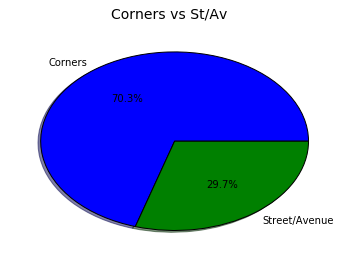

In [59]:
labels = 'Corners', 'Street/Avenue'
fracs = SF_train_data.groupby('IsCorner').size()
plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)
plt.suptitle('Corners vs St/Av', fontsize=14)

plt.show()

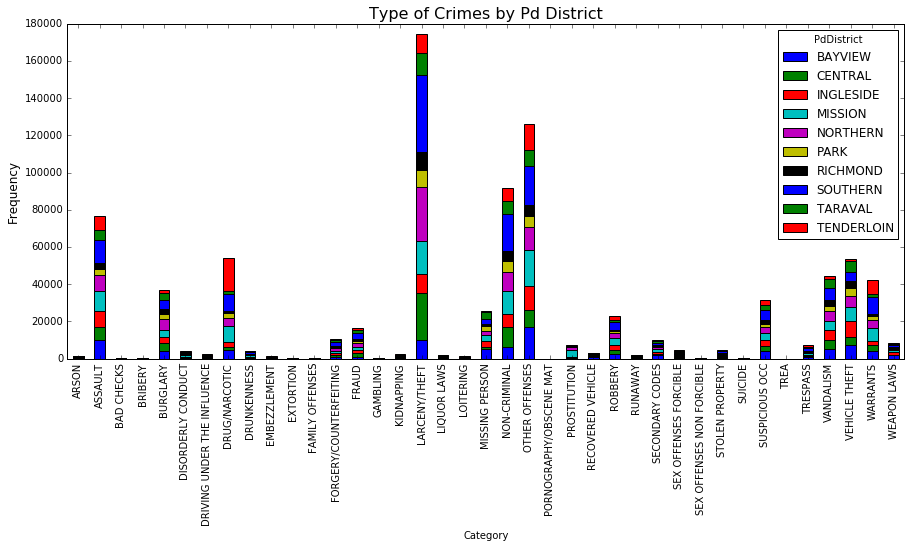

In [61]:
category_pdDistrict = SF_train_data.groupby(['Category','PdDistrict']).size()
category_pd_plot = category_pdDistrict.unstack().plot(
                                        kind='bar', 
                                        figsize=(15, 6), 
                                        stacked=True)
category_pd_plot.set_ylabel("Frequency", fontsize=12)
category_pd_plot.set_title("Type of Crimes by Pd District", fontsize=16)

In [36]:
#Create new columns with the year, month and day
SF_train_data['Year'] = SF_train_data['Dates'].dt.year
SF_train_data['Month'] = SF_train_data['Dates'].dt.month
SF_train_data['Day'] = SF_train_data['Dates'].dt.day
SF_train_data['Hour'] = SF_train_data['Dates'].dt.hour

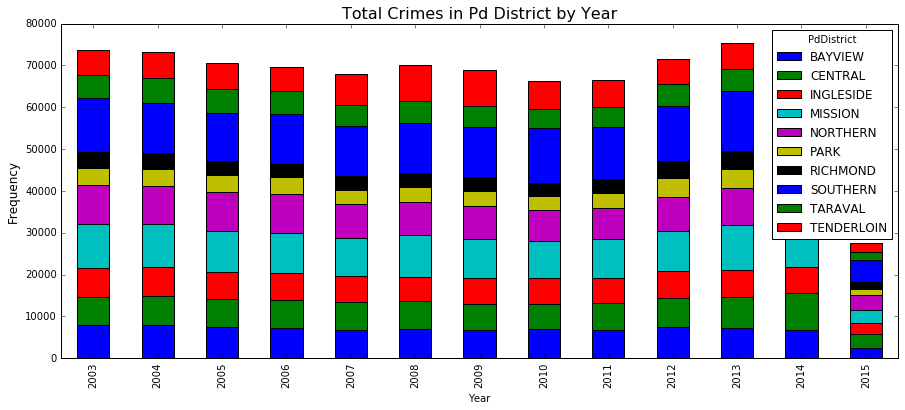

In [62]:
year_pdDistrict = SF_train_data.groupby(['Year','PdDistrict']).size()
year_pdDistrict_plot = year_pdDistrict.unstack().plot(
                                kind='bar', 
                                figsize=(15, 6), 
                                stacked=True)
year_pdDistrict_plot.set_xlabel("Year")
year_pdDistrict_plot.set_ylabel("Frequency", fontsize=12)
year_pdDistrict_plot.set_title("Total Crimes in Pd District by Year",fontsize=16)

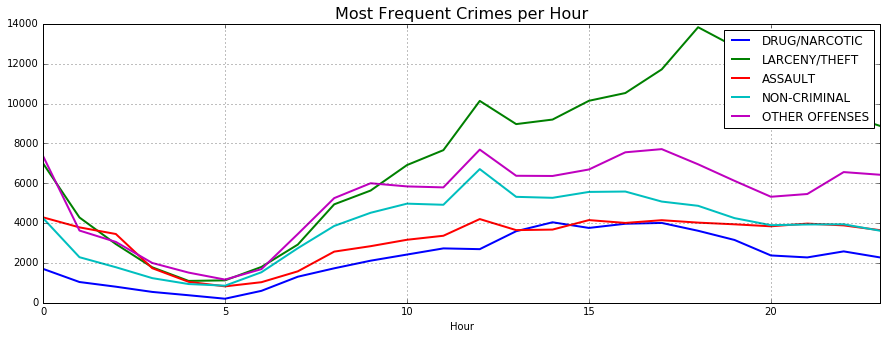

In [65]:
criteria = SF_train_data['Category'].map(lambda x: x in 
            ('LARCENY/THEFT', 'ASSAULT', 'DRUG/NARCOTIC', 
             'OTHER OFFENSES', 'NON-CRIMINAL'))
crimes_hour = SF_train_data[criteria]
assault = crimes_hour[crimes_hour['Category'] == 'ASSAULT']
hourFreqAssault = assault.groupby('Hour').size()
larceny = crimes_hour[crimes_hour['Category'] == 'LARCENY/THEFT']
hourFreqLarceny = larceny.groupby('Hour').size()
drugs = crimes_hour[crimes_hour['Category'] == 'DRUG/NARCOTIC']
hourFreqDrugs = drugs.groupby('Hour').size()
nonCriminal = crimes_hour[crimes_hour['Category'] == 'NON-CRIMINAL']
hourFreqNC = nonCriminal.groupby('Hour').size()
otherOffenses = crimes_hour[crimes_hour['Category'] == 'OTHER OFFENSES']
hourFreqOO = otherOffenses.groupby('Hour').size()

hours = np.arange(24)

fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(hours, hourFreqDrugs, 
         hours, hourFreqLarceny, 
         hours, hourFreqAssault,
         hours, hourFreqNC,
         hours, hourFreqOO,
         linewidth=2.0)
ax1.set_xlabel('Hour')
ax1.legend(['DRUG/NARCOTIC', 'LARCENY/THEFT',  
            'ASSAULT', 'NON-CRIMINAL', 'OTHER OFFENSES'])
ax1.set_xlim(0, 23)
ax1.set_title('Most Frequent Crimes per Hour', fontsize=16)
plt.grid()

In [66]:
#Create new column with IsAm value 
SF_train_data['IsDawning'] = ((SF_train_data['Hour'] >= 0) & (SF_train_data['Hour'] <= 6))
SF_train_data['IsMorning'] = ((SF_train_data['Hour'] >= 7) & (SF_train_data['Hour'] <= 12))
SF_train_data['IsAfternoon'] = ((SF_train_data['Hour'] >= 13) & (SF_train_data['Hour'] <= 18))
SF_train_data['IsNight'] = ((SF_train_data['Hour'] >= 19) & (SF_train_data['Hour'] <= 23))

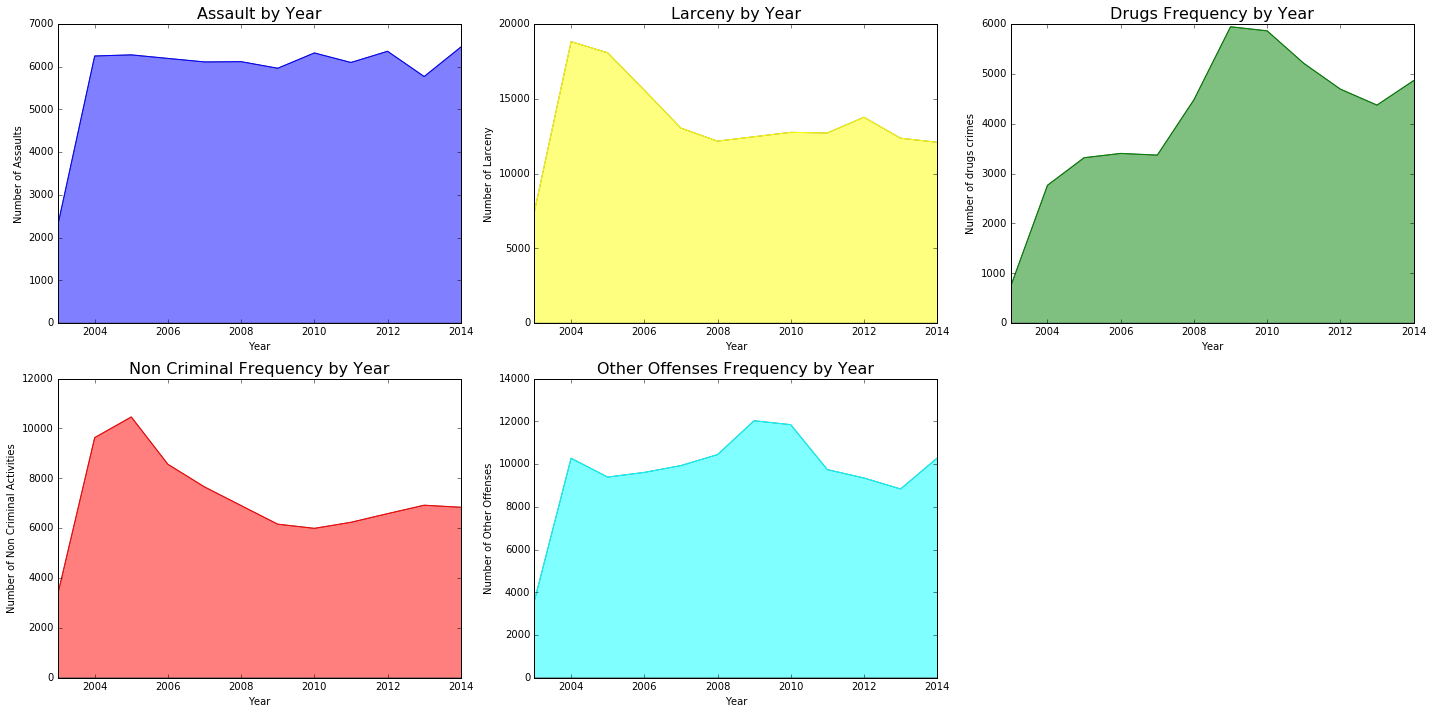

In [68]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(left=0.2, wspace=0.6)

assault_year = SF_train_data[SF_train_data['Category'] == 'ASSAULT']
assault_year = assault_year.groupby('Year').size()
larceny_year = SF_train_data[SF_train_data['Category'] == 'LARCENY/THEFT']
larceny_year = larceny_year.groupby('Year').size()
drugs_year = SF_train_data[SF_train_data['Category'] == 'DRUG/NARCOTIC']
drugs_year = drugs_year.groupby('Year').size()
nonCriminal_year = SF_train_data[SF_train_data['Category'] == 'NON-CRIMINAL']
nonCriminal_year = nonCriminal_year.groupby('Year').size()
otherOffenses_year = SF_train_data[SF_train_data['Category'] == 'OTHER OFFENSES']
otherOffenses_year = otherOffenses_year.groupby('Year').size()

years = pd.unique(SF_train_data.Year.ravel())

ax1 = fig.add_subplot(231)
ax1.plot(years, assault_year)
ax1.set_title('Assault by Year', fontsize=16)
ax1.set_ylabel('Number of Assaults')
ax1.set_xlabel('Year')
ax1.set_xlim(2003, 2014)
ax1.fill_between(years, assault_year, facecolor='blue', alpha=0.5)

ax2 = fig.add_subplot(232)
ax2.plot(years, larceny_year, color='yellow')
ax2.set_title('Larceny by Year', fontsize=16)
ax2.set_ylabel('Number of Larceny')
ax2.set_xlabel('Year')
ax2.set_xlim(2003, 2014)
ax2.fill_between(years, larceny_year, facecolor='yellow', alpha=0.5)

ax3 = fig.add_subplot(233)
ax3.plot(years, drugs_year, color='green')
ax3.set_title('Drugs Frequency by Year', fontsize=16)
ax3.set_ylabel('Number of drugs crimes')
ax3.set_xlabel('Year')
ax3.set_xlim(2003, 2014)
ax3.fill_between(years, drugs_year, facecolor='green', alpha=0.5)

ax4 = fig.add_subplot(234)
ax4.plot(years, nonCriminal_year, color='red')
ax4.set_title('Non Criminal Frequency by Year', fontsize=16)
ax4.set_ylabel('Number of Non Criminal Activities')
ax4.set_xlabel('Year')
ax4.set_xlim(2003, 2014)
ax4.fill_between(years, nonCriminal_year, facecolor='red', alpha=0.5)

ax5 = fig.add_subplot(235)
ax5.plot(years, otherOffenses_year, color='cyan')
ax5.set_title('Other Offenses Frequency by Year', fontsize=16)
ax5.set_ylabel('Number of Other Offenses')
ax5.set_xlabel('Year')
ax5.set_xlim(2003, 2014)
ax5.fill_between(years, otherOffenses_year, facecolor='cyan', alpha=0.5)

fig.tight_layout()

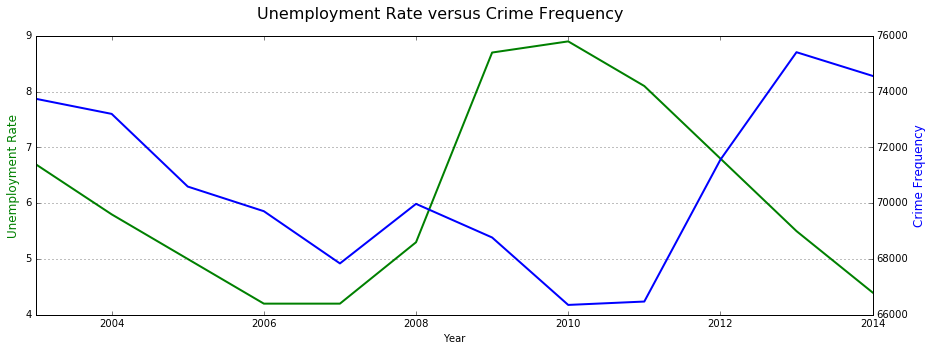

In [69]:
UnemploymentRate = pd.read_csv('UnemploymentRate1.csv')
UnemploymentRate.reindex(columns=['Year','UnemploymentRate'])
UnemploymentRate = UnemploymentRate.drop(
                    UnemploymentRate[UnemploymentRate['Year'] == 2015].index )
crimes_year = SF_train_data
crimes_year = crimes_year.drop(crimes_year[crimes_year['Year'] == 2015].index )
CrimePerYear = crimes_year.groupby('Year').size()

fig, ax1 = plt.subplots(figsize=(15,5))
ax2 = ax1.twinx()
ax1.plot(UnemploymentRate['Year'], UnemploymentRate['UnemploymentRate']*100, 'g-', linewidth=2.0)
ax2.plot(UnemploymentRate['Year'], CrimePerYear , 'b-', linewidth=2.0)

ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate', color='g', fontsize=12)
ax2.set_ylabel('Crime Frequency', color='b', fontsize=12)
ax1.set_xlim(2003, 2014)

plt.suptitle("Unemployment Rate versus Crime Frequency", fontsize=16)
plt.grid(True)
plt.savefig('Unemployment Rate versus Crime Frequency')

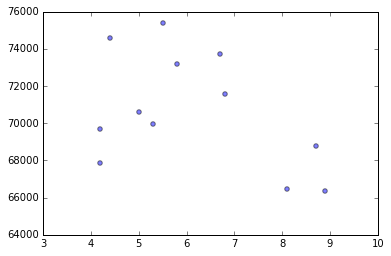

In [70]:
from matplotlib.backends.backend_pdf import PdfPages

#Test if there is any relationship between unemployment rate and crime frequency
plt.scatter(UnemploymentRate['UnemploymentRate']*100, CrimePerYear, alpha=0.5)

pp = PdfPages('ScatterPlot.pdf')
pp.savefig()
pp.close()

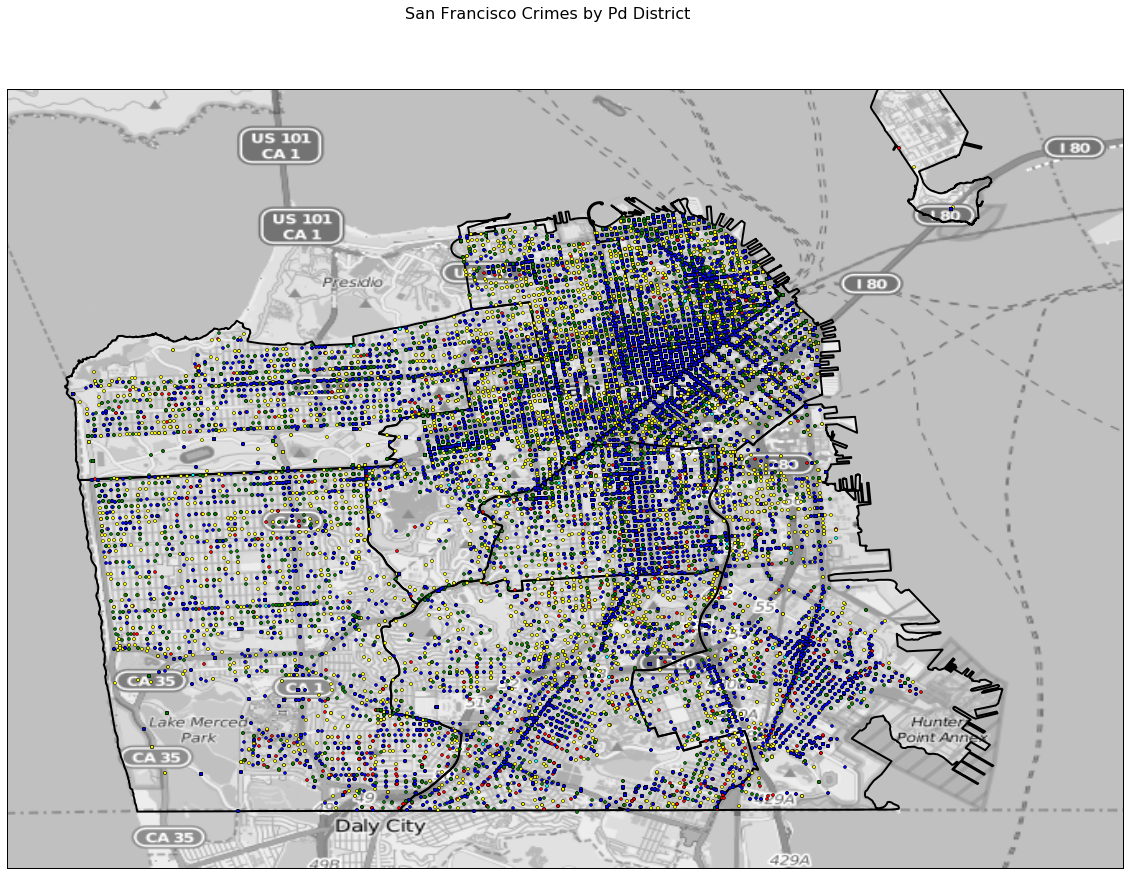

In [88]:
# Import matplotlib and Basemap
from mpl_toolkits.basemap import Basemap
from PIL import Image

# Create a figure of size
fig = plt.figure(figsize=(20,14))

# Create a map, using the Gall–Peters projection, 
#projection = 'aea', 'eqdc', 'lcc'
map = Basemap(projection='cyl',
                  resolution = 'h',
                  llcrnrlon = -122.52469, #Inferior corner lon
                  llcrnrlat = 37.69862, #Inferior corner lat
                  urcrnrlon = -122.33663, #Superior corner lon
                  urcrnrlat = 37.82986, #Superior corner lat
                  lat_0=37.752303,
                  lon_0=-122.445576)

# Define the longitude and latitude points
Assault = SF_train_data[(SF_train_data['Category'] == 'ASSAULT') & (SF_train_data['Year'] == 2014)]
DrugNarcotics = SF_train_data[(SF_train_data['Category'] == 'DRUG/NARCOTIC')& (SF_train_data['Year'] == 2014)]
LarceniesThefts = SF_train_data[(SF_train_data['Category'] == 'LARCENY/THEFT')& (SF_train_data['Year'] == 2014)]
NonCriminal = SF_train_data[(SF_train_data['Category'] == 'NON-CRIMINAL')& (SF_train_data['Year'] == 2014)]
OtherOffenses = SF_train_data[(SF_train_data['Category'] == 'OTHER OFFENSES')& (SF_train_data['Year'] == 2014)]

xAssault,yAssault = map(Assault['X'].values, Assault['Y'].values)
xDrugNarcotics,yDrugNarcotics = map(DrugNarcotics['X'].values, DrugNarcotics['Y'].values)
xLarceniesThefts,yLarceniesThefts = map(LarceniesThefts['X'].values, LarceniesThefts['Y'].values)
xNonCriminal,yNonCriminal = map(NonCriminal['X'].values, NonCriminal['Y'].values)
xOtherOffenses,yOtherOffenses = map(OtherOffenses['X'].values, OtherOffenses['Y'].values)

map.plot(xAssault, yAssault, 'ro', markersize=3, c='red')
map.plot(xDrugNarcotics, yDrugNarcotics,'ro', markersize=3, c='cyan')
map.plot(xLarceniesThefts, yLarceniesThefts,'ro', markersize=3, c='yellow')
map.plot(xNonCriminal, yNonCriminal,'ro', markersize=3, c='green')
map.plot(xOtherOffenses, yOtherOffenses,'ro', markersize=3, c='blue')

map.shadedrelief()

# Show the map
plt.suptitle('San Francisco Crimes by Pd District', fontsize=16)
mapdata = np.loadtxt("sf_map_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, 
          cmap = plt.get_cmap('gray'), 
          extent=[-122.52469, -122.33663, 37.69862, 37.82986])

map.readshapefile('sfpd_districts1', 'PdDistricts',  linewidth=2)

plt.show()

In [ ]:
#Created new subset of hours
SF_train_data['IsDawning'] = ((SF_train_data['Hour'] >= 0) & 
                              (SF_train_data['Hour'] <= 6))
SF_train_data['IsMorning'] = ((SF_train_data['Hour'] >= 7) & 
                              (SF_train_data['Hour'] <= 12))
SF_train_data['IsAfternoon'] = ((SF_train_data['Hour'] >= 13) & 
                                (SF_train_data['Hour'] <= 18))
SF_train_data['IsNight'] = ((SF_train_data['Hour'] >= 19) & 
                            (SF_train_data['Hour'] <= 23))

In [ ]:
#Hekper function for creating season
def get_season(x):
    summer=0
    fall=0
    winter=0
    spring=0
    if (x in [5, 6, 7]):
        summer=1
    if (x in [8, 9, 10]):
        fall=1
    if (x in [11, 0, 1]):
        winter=1
    if (x in [2, 3, 4]):
        spring=1
    return summer, fall, winter, spring

In [ ]:
#Subsetting the dataset leaving the most frequent crimes
criteria = SF_train_data['Category'].map(
                        lambda x: x in ('LARCENY/THEFT', 'ASSAULT', 
                                        'DRUG/NARCOTIC', 'NON-CRIMINAL',
                                        'OTHER OFFENSES'))
SF_subset = SF_train_data[criteria]

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

#Convert crime labels to numbers
le_crime = preprocessing.LabelEncoder()
crime = le_crime.fit_transform(SF_subset.Category)

#Get binarized weekdays, districts, and hours.
days = pd.get_dummies(SF_subset.DayOfWeek)
district = pd.get_dummies(SF_subset.PdDistrict)
hour = SF_subset.Dates.dt.hour
hour = pd.get_dummies(hour) 
 
#Create season columns
months = SF_subset['Month']
SF_subset.loc[:,'Summer'], SF_subset.loc[:,'Fall'], SF_subset.loc[:,'Winter'], SF_subset.loc[:,'Spring'] = zip(*months.apply(get_season))

#Build new array
train_data = pd.concat([hour, days, district, SF_subset['IsCorner'],  
                        SF_subset['IsDawning'], SF_subset['IsMorning'], 
                        SF_subset['IsAfternoon'], SF_subset['IsNight'], 
                        SF_subset['Summer'], SF_subset['Fall'], 
                        SF_subset['Winter'], SF_subset['Spring']], axis=1)
train_data['Crime'] = crime

In [ ]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# Fit the training data to the Survived labels and create the decision trees
features = ['IsCorner', 'Friday', 'Monday', 'Saturday', 'Sunday', 
            'Thursday', 'Tuesday','Wednesday', 'BAYVIEW', 'CENTRAL', 
            'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 
            'SOUTHERN', 'TARAVAL', 'TENDERLOIN', 'IsDawning', 'IsMorning', 
            'IsAfternoon', 'IsNight', 'Summer', 'Fall', 'Winter', 'Spring']

In [ ]:
# Fit the training data to the Survived labels and create the decision trees
features = ['IsCorner',  'BAYVIEW', 'TENDERLOIN', 'IsDawning']

In [ ]:
training, validation = train_test_split(train_data, train_size=.70)

treeclf.fit(training[features], training['Crime'])
treeclf.score(training[features], training['Crime'])

In [ ]:
# compute the "Gini importance" of each feature: the (normalized) total reduction of MSE brought by that feature
pd.DataFrame({'feature':features, 'importance':treeclf.feature_importances_})

In [ ]:
#null error rate
training['Crime'].mean()

In [ ]:
# make predictions
predicted = treeclf.predict(validation[features])
print predicted
#print pd.DataFrame(preds, validation['ASSAULT'])

In [ ]:
# generate class probabilities
probs = treeclf.predict_proba(validation[features])
print probs

In [ ]:
from sklearn import metrics
# generate evaluation metrics
print metrics.accuracy_score(validation['Crime'], predicted)

In [ ]:
from sklearn.cross_validation import cross_val_score
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(DecisionTreeClassifier(), training[features], training['Crime'], scoring='accuracy', cv=10)
print scores
print scores.mean()

In [ ]:
# print RMSE
np.sqrt(metrics.mean_squared_error(validation['Crime'], predicted))

In [ ]:
print features

In [ ]:
treeclf.predict_proba(np.array([1, 0, 0, 0, 0, 1, 0, 0,
                               0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1,-1))

In [ ]:
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

#List unique values in the Category column
class_names = pd.unique(SF_subset.Category.ravel())
dot_data = StringIO() 
export_graphviz(treeclf, out_file=dot_data, 
                        feature_names=features,
                        class_names=class_names, 
                        filled = True,
                        rounded = True,
                        special_characters=True) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
pydot.graph_from_dot_data(dot_data.getvalue()).write_png("SF_Crime.png")

In [ ]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(training[features], training['Crime'])
logreg.score(training[features], training['Crime'])
